# Imports:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import explore
import prepare

### 1.) Using lemonade.csv dataset and focusing on continuous variables:



In [2]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [3]:
df = pd.read_csv(url)

In [60]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [61]:
df.Date = pd.to_datetime(df.Date)

AttributeError: 'DataFrame' object has no attribute 'Date'

In [62]:
df = df.set_index('Date').sort_values('Date')

KeyError: "None of ['Date'] are in the columns"

----------

In [63]:
def detect_outliers(df, k, col_list):
    ''' get upper and lower bound for list of columns in a dataframe 
        if desired return that dataframe with the outliers removed
    '''
    
    odf = pd.DataFrame()
    df = df.select_dtypes(include=['int', 'float'])
    
    for col in col_list:
        

        q1, q2, q3 = df[f'{col}'].quantile([.25, .5, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound
        
        # print each col and upper and lower bound for each column
        print(f"{col}: Median = {q2} lower_bound = {lower_bound} upper_bound = {upper_bound}")

        # return dataframe of outliers
        odf = odf.append(df[(df[f'{col}'] < lower_bound) | (df[f'{col}'] > upper_bound)])
            
    return odf

In [64]:
def show_outliers(df, k, columns):
    '''
    calculates the lower and upper bound to locate outliers and displays them
    recommended k be 1.5 and entered as integer
    '''
    df = df.select_dtypes(include=['int', 'float'])
    for i in columns:
        df = df.select_dtypes(include=['int', 'float'])
        quartile1, quartile3 = np.percentile(df[i], [25,75])
        IQR_value = quartile3 - quartile1
        lower_bound = (quartile1 - (k * IQR_value))
        upper_bound = (quartile3 + (k * IQR_value))
        print(f'For {i} the lower bound is {lower_bound} and  upper bound is {upper_bound}')
        

In [100]:
def show_outliers_plot(df, k, columns):
    '''
    calculates the lower and upper bound to locate outliers and displays them
    recommended k be 1.5 and entered as integer
    '''
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            quartile1, quartile3 = np.percentile(df[col], [25,75])
            IQR_value = quartile3 - quartile1
            lower_bound = (quartile1 - (k * IQR_value))
            upper_bound = (quartile3 + (k * IQR_value))
            print(f'For {col} the lower bound is {lower_bound} and  upper bound is {upper_bound}')
            plt.figure(figsize = (16,6))
            plt.subplot(1, 2, 1)
            sns.histplot(data = df, x = df[col], kde=True)
            plt.axvline(lower_bound, c = 'blue')
            plt.axvline(upper_bound, c = 'green')
            plt.title(col)
            plt.subplot(1, 2, 2)
            sns.boxplot(data=df, x= df[col],whis = k,)
            plt.axvline(lower_bound, c = 'blue')
            plt.axvline(upper_bound, c = 'green')
            plt.show()   
            print('-------------------------------------------------------------------')

In [101]:
def detect_outliers(df, k, col_list):
    ''' get upper and lower bound for list of columns in a dataframe 
        if desired return that dataframe with the outliers removed
    '''
    
    odf = pd.DataFrame()
    #df.select_dtypes(include=['int', 'float'])
    
    for col in col_list:
        if df[col].dtypes != 'O':
            q1, q2, q3 = df[f'{col}'].quantile([.25, .5, .75])  # get quartiles
            iqr = q3 - q1   # calculate interquartile range
        
            upper_bound = q3 + k * iqr   # get upper bound
            lower_bound = q1 - k * iqr   # get lower bound
        
            # print each col and upper and lower bound for each column
            print(f"{col}: Median = {q2} lower_bound = {lower_bound} upper_bound = {upper_bound}")

            # return dataframe of outliers
            odf = odf.append(df[(df[f'{col}'] < lower_bound) | (df[f'{col}'] > upper_bound)])
        
            
    return odf

In [102]:
def detect_outliers_test(df, k, col_list):
    ''' get upper and lower bound for list of columns in a dataframe 
        if desired return that dataframe with the outliers removed
    '''
    
    #df.select_dtypes(include=['int', 'float'])
    
    for col in col_list:
        if df[col].dtypes != 'O':
            q1, q2, q3 = df[f'{col}'].quantile([.25, .5, .75])  # get quartiles
            iqr = q3 - q1   # calculate interquartile range
        
            upper_bound = q3 + k * iqr   # get upper bound
            lower_bound = q1 - k * iqr   # get lower bound
        
            # print each col and upper and lower bound for each column
            print(f"{col}: Median = {q2} lower_bound = {lower_bound} upper_bound = {upper_bound}")

            # return dataframe of outliers
            
    
            
        
            
    return df[(df[f'{col}'] < lower_bound) | (df[f'{col}'] > upper_bound)]

In [103]:
detect_outliers_test(df,1.5, df.columns)

Temperature: Median = 61.1 lower_bound = 16.700000000000003 upper_bound = 104.7
Rainfall: Median = 0.74 lower_bound = 0.26 upper_bound = 1.3
Flyers: Median = 39.0 lower_bound = 4.0 upper_bound = 76.0
Price: Median = 0.5 lower_bound = 0.5 upper_bound = 0.5
Sales: Median = 25.0 lower_bound = 5.0 upper_bound = 45.0
Temperature_zscore: Median = -0.006892528839083884 lower_bound = -2.461844668754625 upper_bound = 2.4038262391860874
Rainfall_zscore: Median = -0.313894333212997 lower_bound = -2.0664210119547604 upper_bound = 1.7307201253190607
Flyers_zscore: Median = -0.08008660838246748 lower_bound = -2.6188122214991507 upper_bound = 2.6037090397694547
Price_zscore: Median = nan lower_bound = nan upper_bound = nan
Sales_zscore: Median = -0.09259859128128581 lower_bound = -0.738841149936531 upper_bound = 0.5536439673739595


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Price_zscore,Sales_zscore
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,NaN,3.720233
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,NaN,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,NaN,6.692948
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,1.270346,-0.861559,0.645264,NaN,16.354275


In [104]:
detect_outliers(df, 1.5, df.columns)

Temperature: Median = 61.1 lower_bound = 16.700000000000003 upper_bound = 104.7
Rainfall: Median = 0.74 lower_bound = 0.26 upper_bound = 1.3
Flyers: Median = 39.0 lower_bound = 4.0 upper_bound = 76.0
Price: Median = 0.5 lower_bound = 0.5 upper_bound = 0.5
Sales: Median = 25.0 lower_bound = 5.0 upper_bound = 45.0
Temperature_zscore: Median = -0.006892528839083884 lower_bound = -2.461844668754625 upper_bound = 2.4038262391860874
Rainfall_zscore: Median = -0.313894333212997 lower_bound = -2.0664210119547604 upper_bound = 1.7307201253190607
Flyers_zscore: Median = -0.08008660838246748 lower_bound = -2.6188122214991507 upper_bound = 2.6037090397694547
Price_zscore: Median = nan lower_bound = nan upper_bound = nan
Sales_zscore: Median = -0.09259859128128581 lower_bound = -0.738841149936531 upper_bound = 0.5536439673739595


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Price_zscore,Sales_zscore
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,NaN,-0.221847
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,NaN,-0.674217
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,NaN,-0.577281
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927,NaN,-0.480344
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507,NaN,-0.415720
5,1/6/17,Friday,25.3,1.54,23,0.5,11,-1.986336,2.606983,-1.240647,NaN,-0.544968
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,-1.566119,2.606983,-1.530787,NaN,-0.480344
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,-1.582706,2.606983,-1.240647,NaN,-0.512656
11,1/12/17,Thursday,38.2,1.33,16,0.5,14,-1.273073,1.840253,-1.748392,NaN,-0.448032
12,1/13/17,Friday,37.5,1.33,19,0.5,15,-1.311777,1.840253,-1.530787,NaN,-0.415720


### a.) Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

For Temperature the lower bound is 16.700000000000003 and  upper bound is 104.7


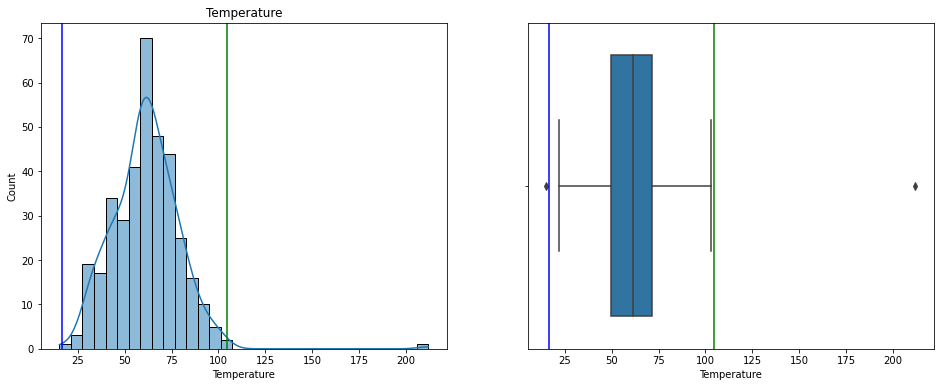

-------------------------------------------------------------------
For Rainfall the lower bound is 0.26 and  upper bound is 1.3


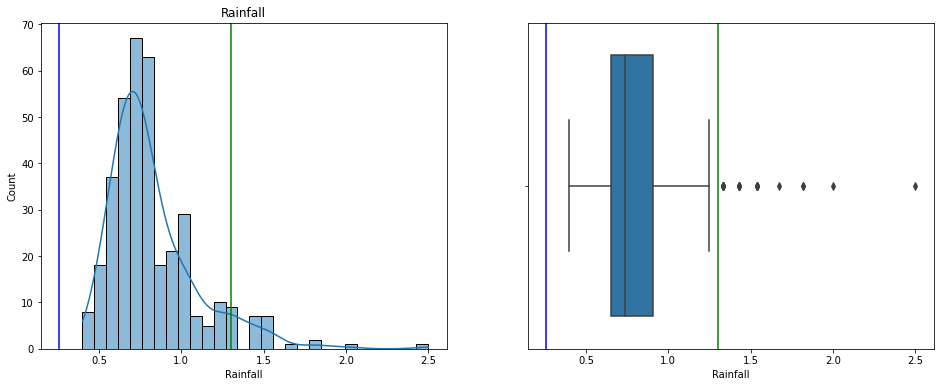

-------------------------------------------------------------------
For Flyers the lower bound is 4.0 and  upper bound is 76.0


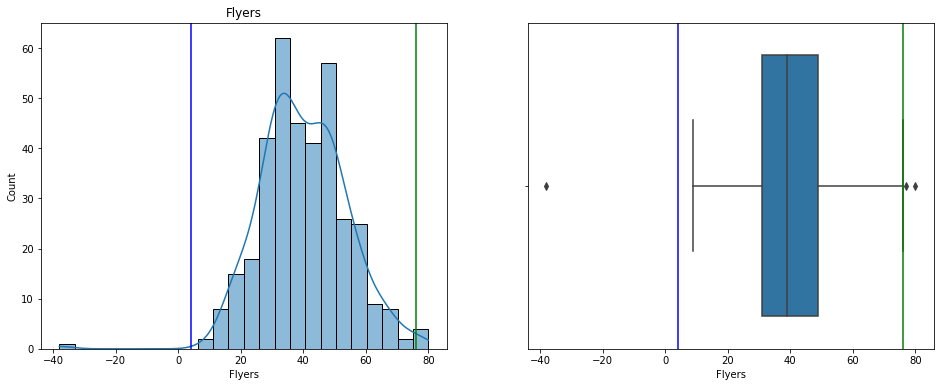

-------------------------------------------------------------------
For Price the lower bound is 0.5 and  upper bound is 0.5


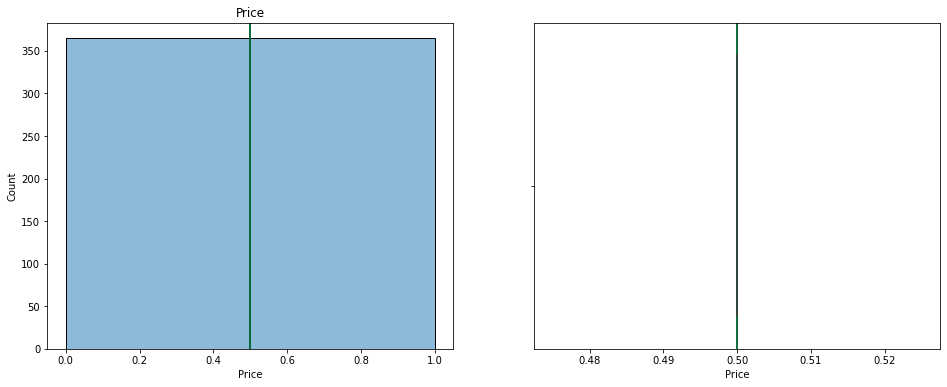

-------------------------------------------------------------------
For Sales the lower bound is 5.0 and  upper bound is 45.0


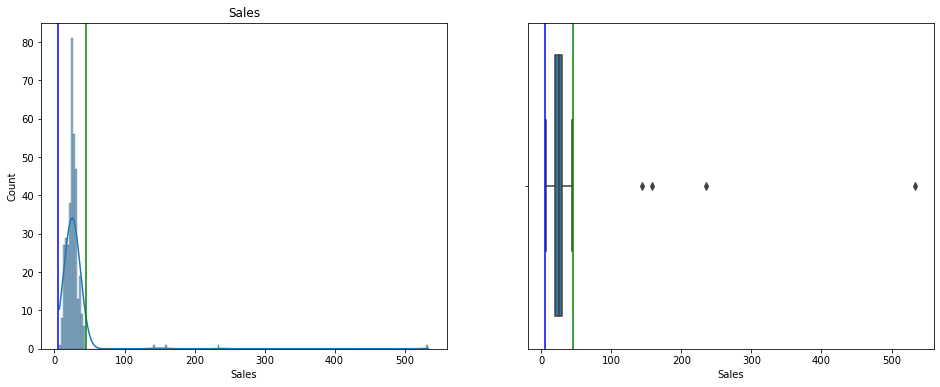

-------------------------------------------------------------------
For Temperature_zscore the lower bound is -2.461844668754625 and  upper bound is 2.4038262391860874


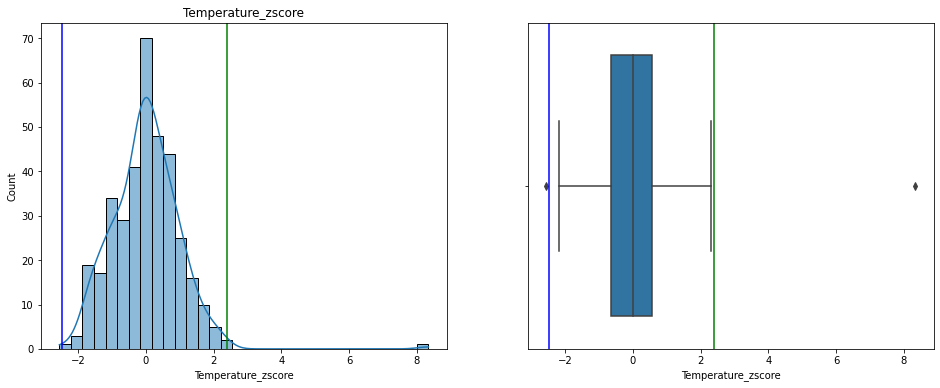

-------------------------------------------------------------------
For Rainfall_zscore the lower bound is -2.0664210119547604 and  upper bound is 1.7307201253190607


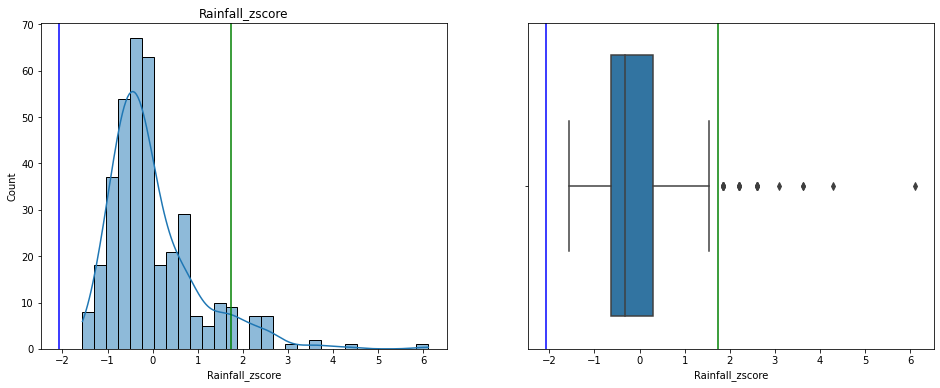

-------------------------------------------------------------------
For Flyers_zscore the lower bound is -2.6188122214991507 and  upper bound is 2.6037090397694547


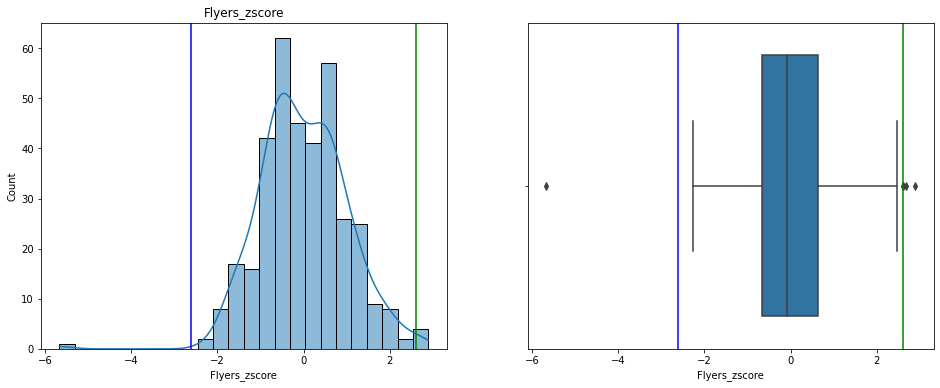

-------------------------------------------------------------------
For Price_zscore the lower bound is nan and  upper bound is nan


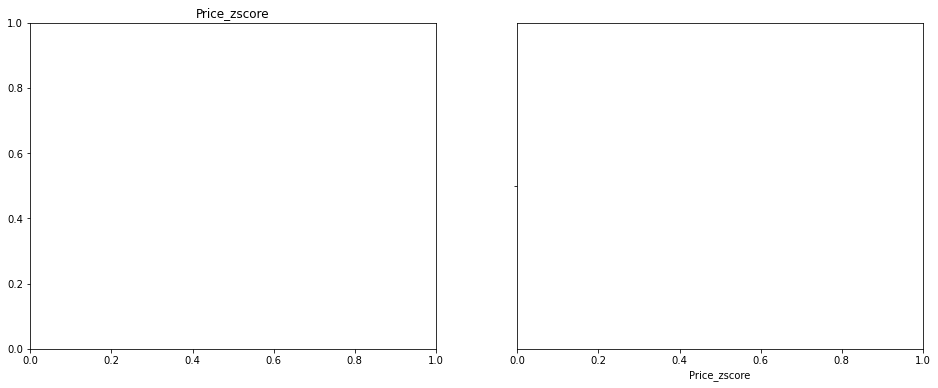

-------------------------------------------------------------------
For Sales_zscore the lower bound is -0.738841149936531 and  upper bound is 0.5536439673739595


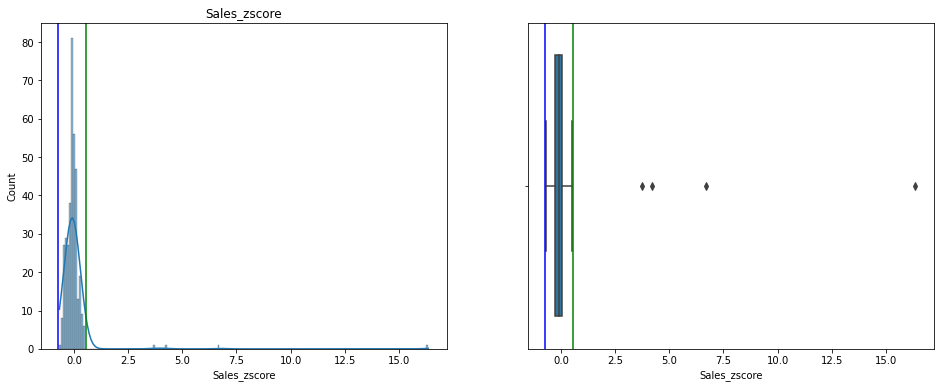

-------------------------------------------------------------------


In [105]:
#function which displays the upper and lower bounds for each numerical columns
show_outliers_plot(df,1.5,df.columns)

In [106]:
# returns a df which is the outlier
odf = detect_outliers(df,1.5,df.columns)

Temperature: Median = 61.1 lower_bound = 16.700000000000003 upper_bound = 104.7
Rainfall: Median = 0.74 lower_bound = 0.26 upper_bound = 1.3
Flyers: Median = 39.0 lower_bound = 4.0 upper_bound = 76.0
Price: Median = 0.5 lower_bound = 0.5 upper_bound = 0.5
Sales: Median = 25.0 lower_bound = 5.0 upper_bound = 45.0
Temperature_zscore: Median = -0.006892528839083884 lower_bound = -2.461844668754625 upper_bound = 2.4038262391860874
Rainfall_zscore: Median = -0.313894333212997 lower_bound = -2.0664210119547604 upper_bound = 1.7307201253190607
Flyers_zscore: Median = -0.08008660838246748 lower_bound = -2.6188122214991507 upper_bound = 2.6037090397694547
Price_zscore: Median = nan lower_bound = nan upper_bound = nan
Sales_zscore: Median = -0.09259859128128581 lower_bound = -0.738841149936531 upper_bound = 0.5536439673739595


- These outliers do make sense, for temperature the value below the lower bound should be kept. 
- Rainfall doesnt have any outliers outside the lower bound.
- Flyers the outliers below the lower bound do not make sense, you cant have -40 flyers.
- Sales doesnt have any outliers below the lower bound.

### b.) Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [107]:
odf.head(100)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Price_zscore,Sales_zscore
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,NaN,-0.221847
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,NaN,-0.674217
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,NaN,-0.577281
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927,NaN,-0.480344
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507,NaN,-0.415720
5,1/6/17,Friday,25.3,1.54,23,0.5,11,-1.986336,2.606983,-1.240647,NaN,-0.544968
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,-1.566119,2.606983,-1.530787,NaN,-0.480344
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,-1.582706,2.606983,-1.240647,NaN,-0.512656
11,1/12/17,Thursday,38.2,1.33,16,0.5,14,-1.273073,1.840253,-1.748392,NaN,-0.448032
12,1/13/17,Friday,37.5,1.33,19,0.5,15,-1.311777,1.840253,-1.530787,NaN,-0.415720


- These outliers do not make sense temperature that high would be a global disaster. Drop these.
- There are priods when excessive amounts of rain can occur for an area. It might be a trend you see. Keep outliers.
- Flyers outliers aboive the upper bound do not appear to be excess noise, is plausible they handed out a large amount of flyers during that period. Keep outliers.
- Sales outliers I would keep the outliers because the high sales count was due to a holiday.

### c.) Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

For Temperature the lower bound is -16.299999999999997 and  upper bound is 137.7


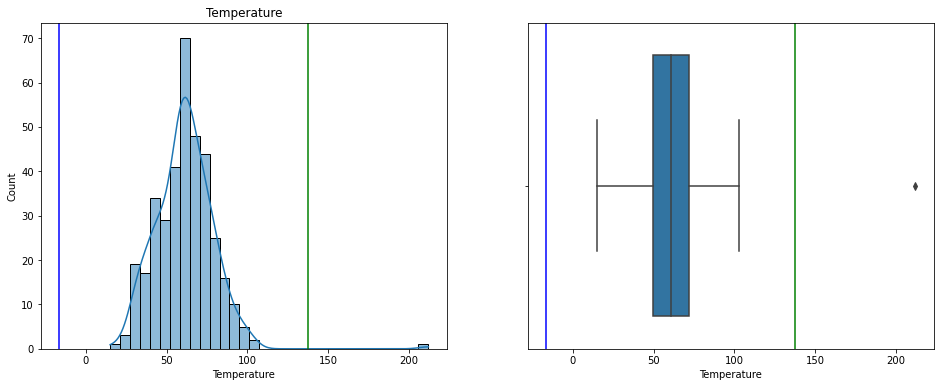

-------------------------------------------------------------------
For Rainfall the lower bound is -0.13 and  upper bound is 1.69


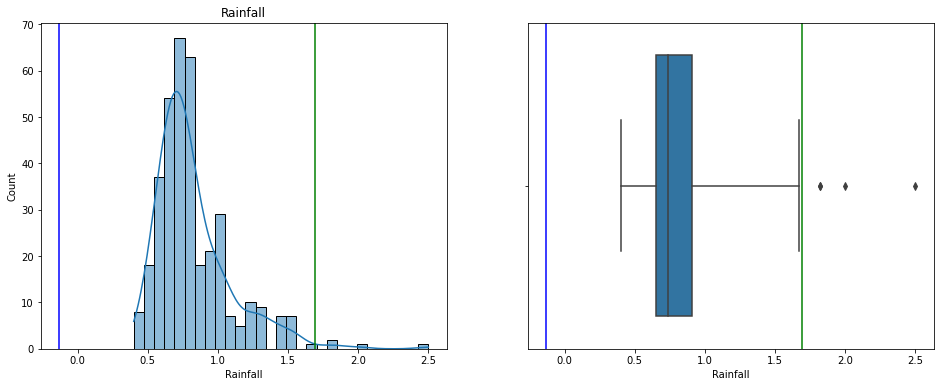

-------------------------------------------------------------------
For Flyers the lower bound is -23.0 and  upper bound is 103.0


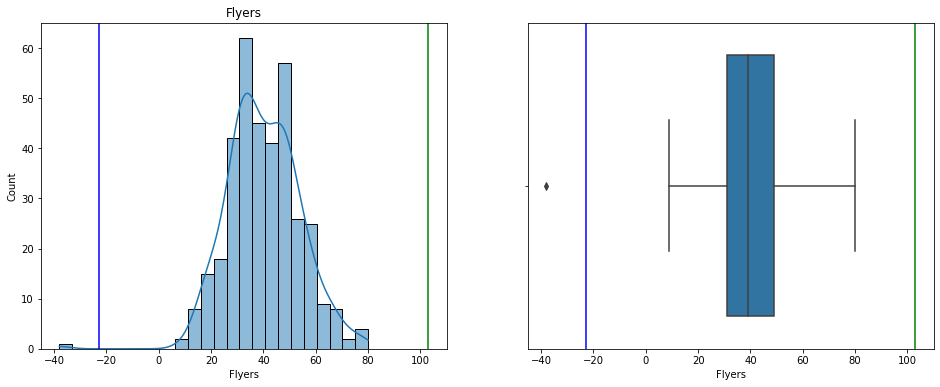

-------------------------------------------------------------------
For Price the lower bound is 0.5 and  upper bound is 0.5


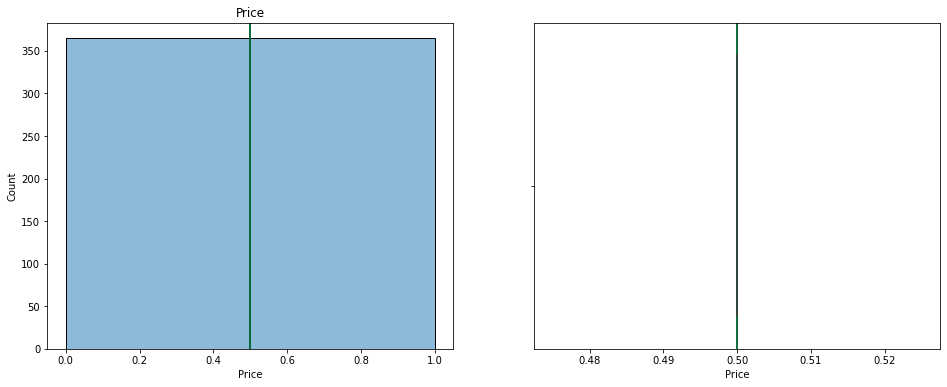

-------------------------------------------------------------------
For Sales the lower bound is -10.0 and  upper bound is 60.0


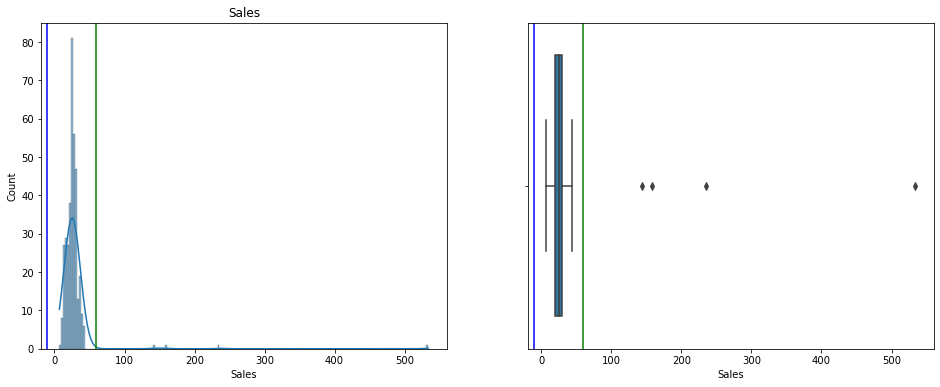

-------------------------------------------------------------------
For Temperature_zscore the lower bound is -4.286471259232393 and  upper bound is 4.228452829663855


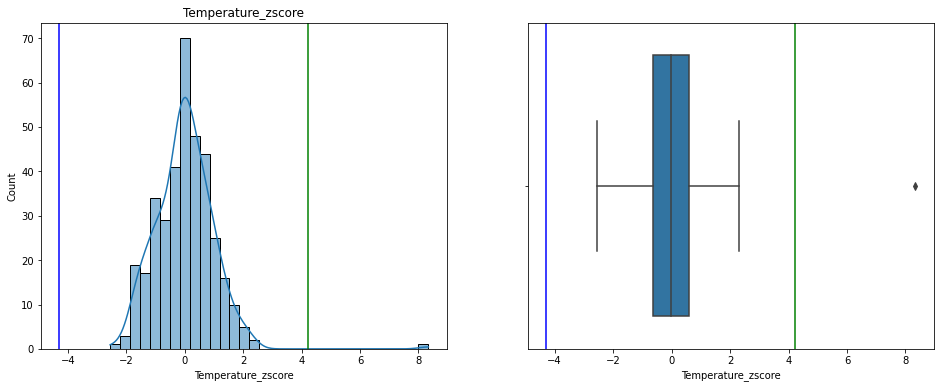

-------------------------------------------------------------------
For Rainfall_zscore the lower bound is -3.4903489384324433 and  upper bound is 3.1546480517967437


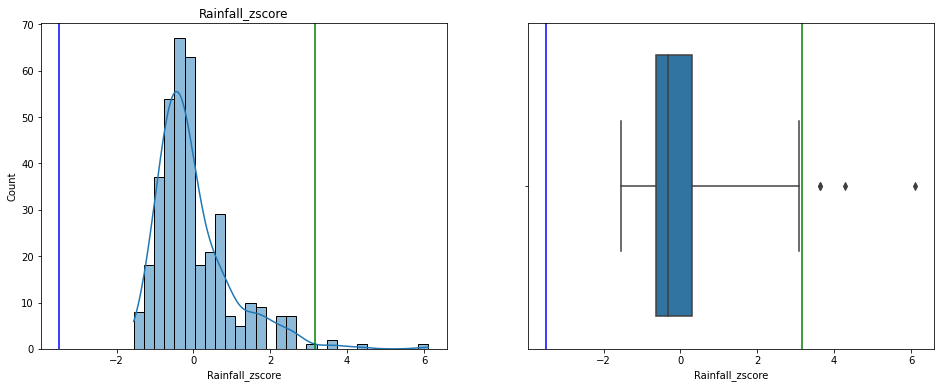

-------------------------------------------------------------------
For Flyers_zscore the lower bound is -4.577257694474878 and  upper bound is 4.562154512745182


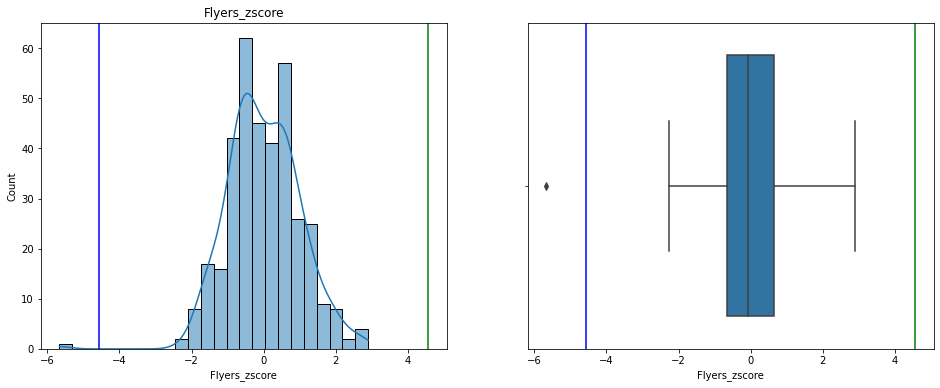

-------------------------------------------------------------------
For Price_zscore the lower bound is nan and  upper bound is nan


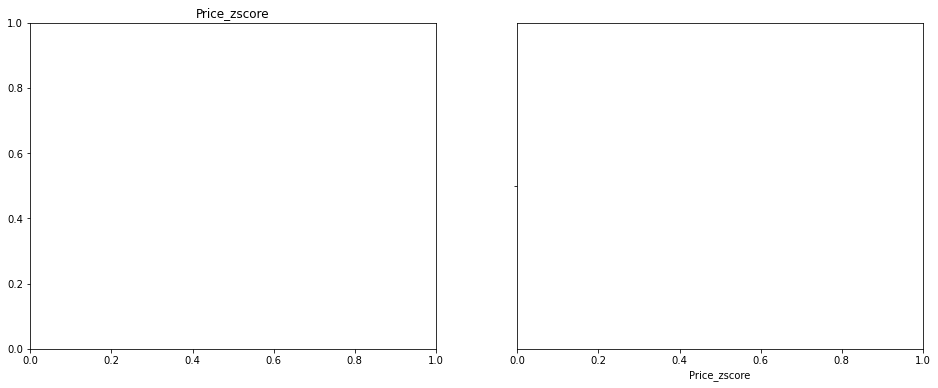

-------------------------------------------------------------------
For Sales_zscore the lower bound is -1.223523068927965 and  upper bound is 1.0383258863653935


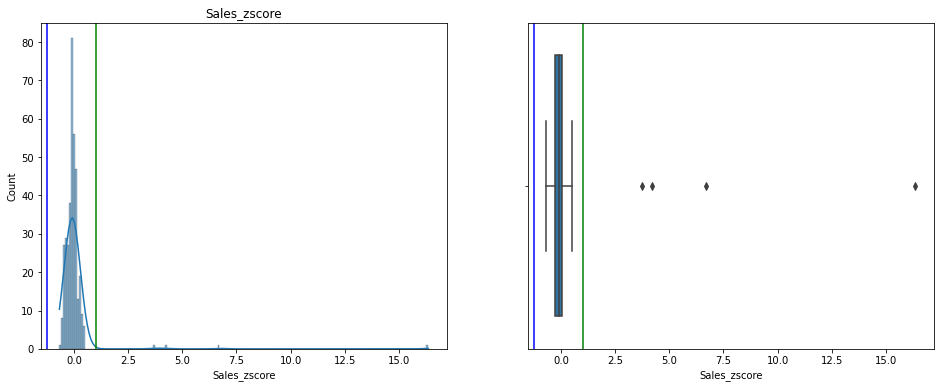

-------------------------------------------------------------------


In [108]:
#function which displays the upper and lower bounds for each numerical columns
show_outliers_plot(df,3,df.columns)

### d.) Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

- These outliers do not make sense temperature that high would be a global disaster. Drop these.
- There are periods when excessive amounts of rain can occur for an area. It might be a trend you see. Keep outliers.
- Flyers outliers aboive the upper bound do not appear to be excess noise, is plausible they handed out a large amount of flyers during that period. Keep outliers.
- Sales outliers I would keep the outliers because the high sales count was due to a holiday.

### 2.) Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    -Should certain outliers be kept or removed?



In [109]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [110]:
df = pd.read_csv(url)

In [111]:
from numpy import mean
from numpy import std

In [112]:
def make_zscore_cols(df):
    '''
    This function calculates the z-score for all the numerical columns and  combines with df
    '''
    
    ## using list comprehension to build z-score columns for my dataframe
    
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            z_scores = pd.Series((df[col] - df[col].mean()) / df[col].std())
            df[f'{col}_zscore'] = z_scores

In [113]:
make_zscore_cols(df)

In [114]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Price_zscore,Sales_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,NaN,-0.577281
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927,NaN,-0.480344
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507,NaN,-0.415720
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,0.817946,-0.877972,NaN,-0.351096
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,0.635391,-0.515297,NaN,-0.318783


In [115]:
def outliers_standard_deviation_plot(df, col_list, number_std = 1):
    ''' get upper and lower bound for list of columns in a dataframe 
        if desired return that dataframe with the outliers removed based on STD
        number_std means number of standard deviations from mean.
    '''
    from numpy import mean
    from numpy import std
    
    for col in col_list:
        if df[col].dtypes != 'O':
            upper = df[col].mean() + (df[col].std()*number_std) 
            lower = df[col].mean() - (df[col].std()*number_std)
            # print each col and upper and lower bound for each column
            print(f"{col}: lower_bound = {lower} upper_bound = {upper}")
            upper1 = df[col].mean() + (df[col].std()*1) 
            lower1 = df[col].mean() - (df[col].std()*1)
            upper2 = df[col].mean() + (df[col].std()*2) 
            lower2 = df[col].mean() - (df[col].std()*2)
            upper3 = df[col].mean() + (df[col].std()*3) 
            lower3 = df[col].mean() - (df[col].std()*3)
            
            
            plt.figure(figsize = (16,6))
            sns.histplot(data = df, x = df[col], kde=True)
            plt.title(col)
            plt.axvline(upper1, c = 'blue')
            plt.axvline(lower1, c = 'blue')
            plt.axvline(upper2, c = 'green')
            plt.axvline(lower2, c = 'green')
            plt.axvline(upper3, c = 'red')
            plt.axvline(lower3, c = 'red')
            plt.show()
            
            print('-------------------------------------------------------------------')

            # return dataframe of outliers
            
    
            
        
            
    #return df[(df[f'{col}'] < lower) | (df[f'{col}'] > upper)]    
    
    
    


Temperature: lower_bound = 43.13876523594401 upper_bound = 79.31054983254923


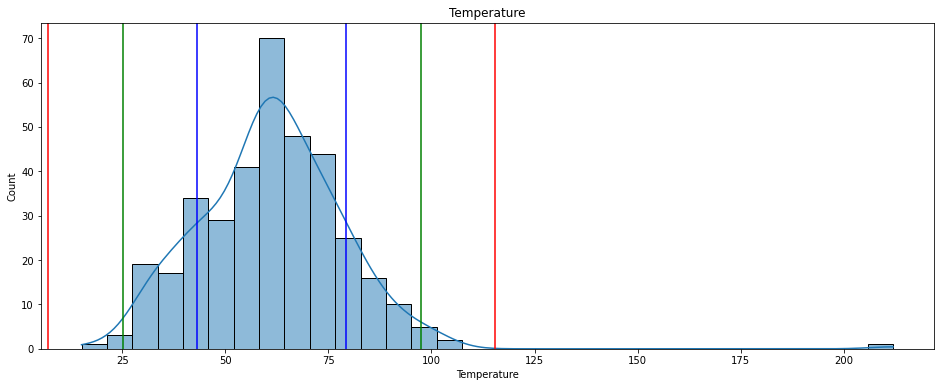

-------------------------------------------------------------------
Rainfall: lower_bound = 0.5520823357198725 upper_bound = 1.0998628697595811


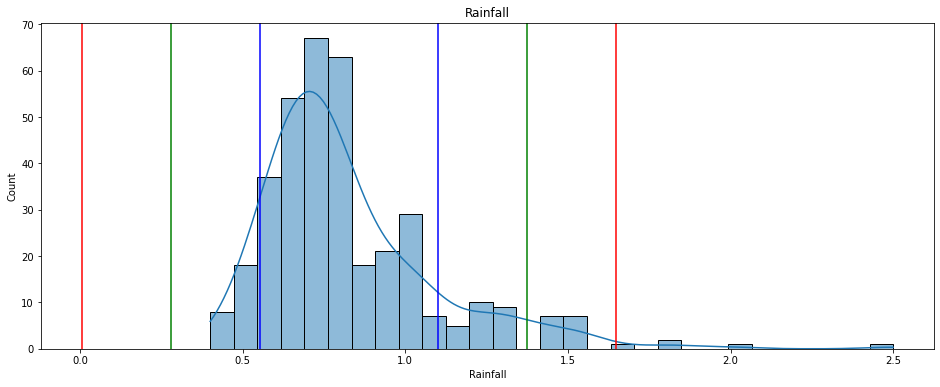

-------------------------------------------------------------------
Flyers: lower_bound = 26.31766499685375 upper_bound = 53.89055418122844


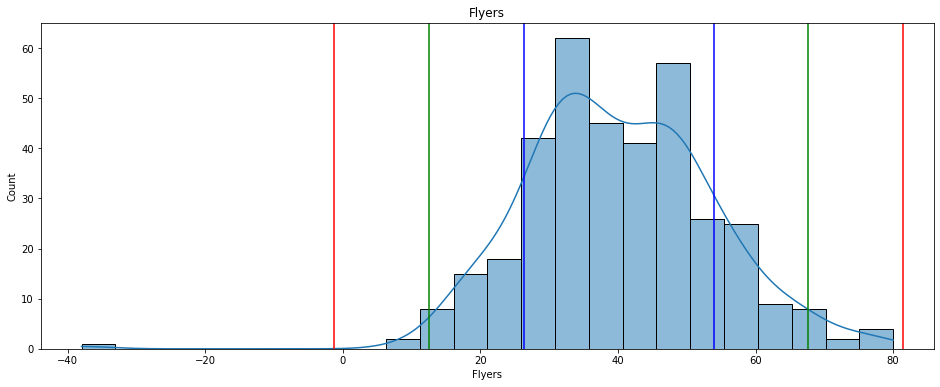

-------------------------------------------------------------------
Price: lower_bound = 0.5 upper_bound = 0.5


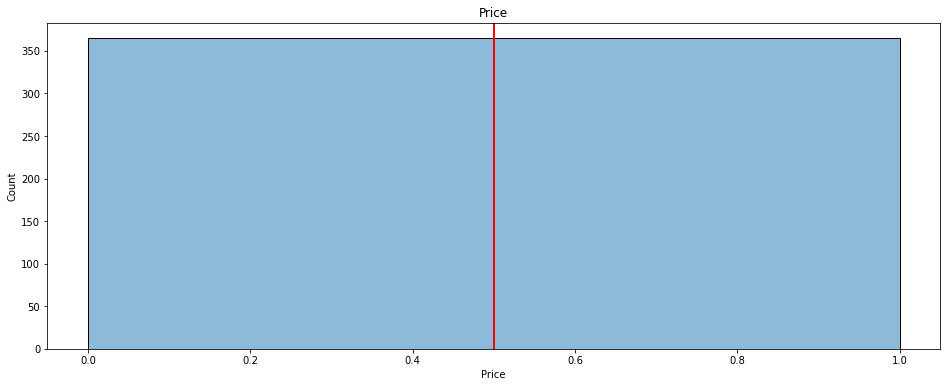

-------------------------------------------------------------------
Sales: lower_bound = -3.082378560982111 upper_bound = 58.813885410297175


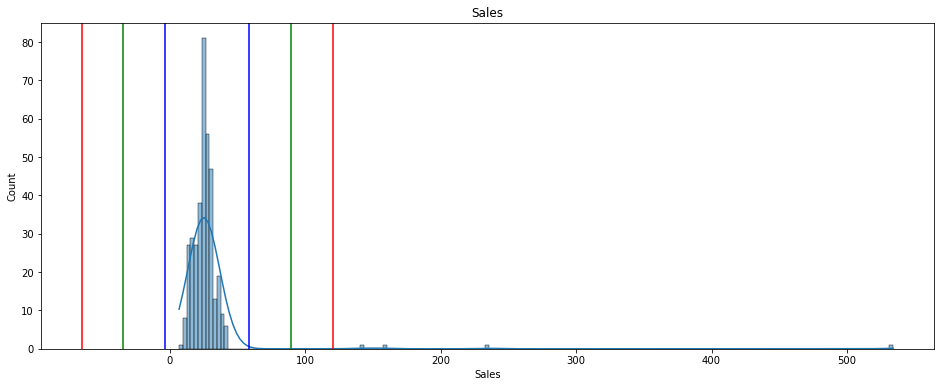

-------------------------------------------------------------------
Temperature_zscore: lower_bound = -1.0000000000000018 upper_bound = 0.9999999999999981


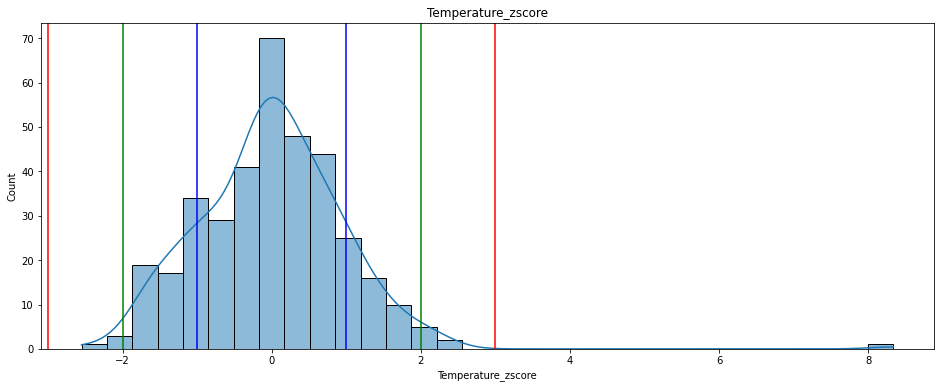

-------------------------------------------------------------------
Rainfall_zscore: lower_bound = -1.0000000000000036 upper_bound = 0.9999999999999977


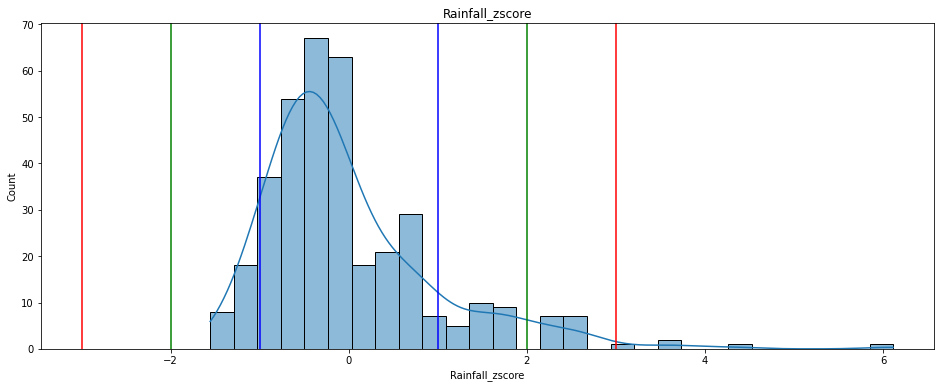

-------------------------------------------------------------------
Flyers_zscore: lower_bound = -0.9999999999999998 upper_bound = 1.0


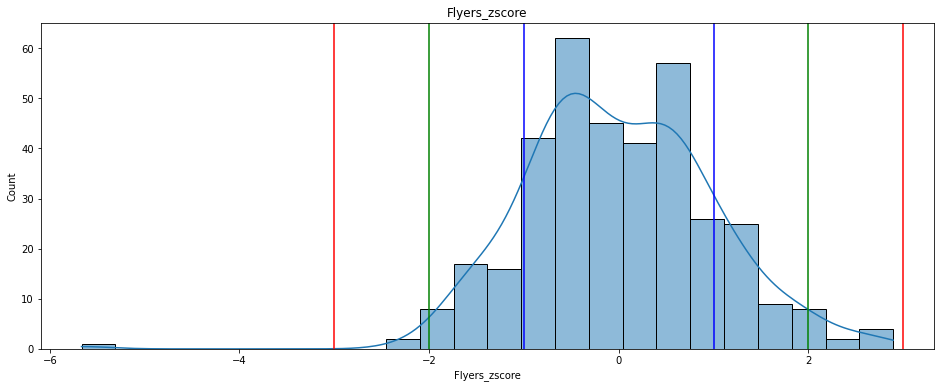

-------------------------------------------------------------------
Price_zscore: lower_bound = nan upper_bound = nan


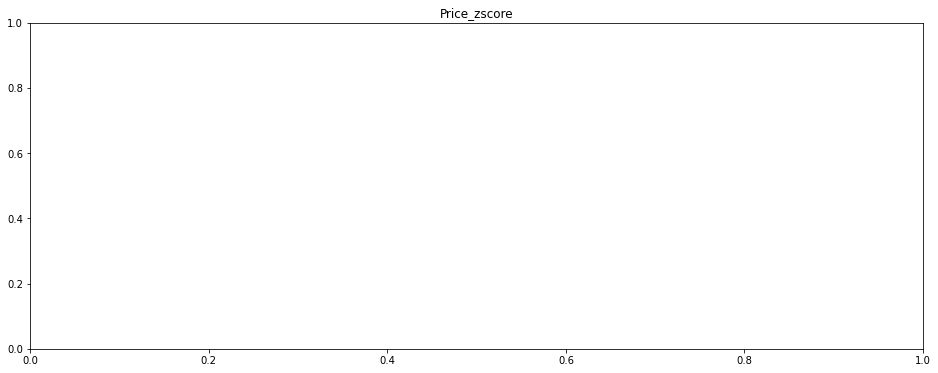

-------------------------------------------------------------------
Sales_zscore: lower_bound = -0.9999999999999998 upper_bound = 1.0000000000000007


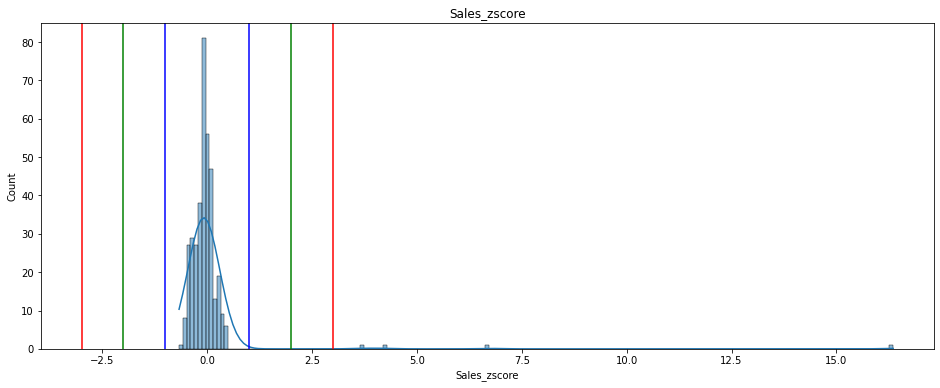

-------------------------------------------------------------------


In [116]:
outliers_standard_deviation_plot(df, df.columns, number_std = 1)